In [1]:
# Import path to source directory (bit of a hack in Jupyter)
import sys
import os
pwd = %pwd
sys.path.append(os.path.join(pwd,'../src'))

# Ensure modules are reloaded on any change (very useful when developing code on the fly)
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')

In [124]:
# Import extrenal librarires
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

# Import our code
from heur import ShootAndGo, SimulatedAnnealing
from objfun import TSPGrid  # <-- our implementation of TSP

In [125]:
tsp = TSPGrid(3,3)

In [126]:
heur = SimulatedAnnealing(tsp, maxeval=1000,
                          max_temperature=1e2, cooling_rate=3e-3,
                          min_temperature=1e-1, restart_period=255)
res = heur.search()
print(res)
tsp.decode(res['best_x'])

{'best_y': 9.4142135623730958, 'best_x': [3, 0, 0, 1, 3, 2, 1, 0], 'neval': 649}


array([0, 4, 1, 2, 5, 8, 7, 6, 3])

In [127]:
heur.temperature

1.1376272858234309

In [128]:
def experiment_SG(of, num_runs, maxeval=1000, hmax=0):
    results = []
    for i in tqdm_notebook(range(num_runs), 'Testing hmax = {}'.format(hmax)):
        result = ShootAndGo(of, maxeval=maxeval, hmax=hmax).search() # dict with results of one run
        result['run'] = i
        result['heur'] = 'SG_{}'.format(hmax) # name of the heuristic
        results.append(result)
    return pd.DataFrame(results, columns=['heur', 'run', 'best_x', 'best_y', 'neval'])

In [129]:
def experiment_SA(of, num_runs, maxeval=1000,
                          max_temperature=1e2, cooling_rate=3e-3,
                          min_temperature=1e-1, restart_period=255):
    results = []
    for i in tqdm_notebook(range(num_runs), 'Computing SA_{},{},{},{}'.format(
                                                max_temperature, cooling_rate,
                                                min_temperature, restart_period)):
        result = SimulatedAnnealing(of, maxeval=maxeval,
                          max_temperature=max_temperature, cooling_rate=cooling_rate,
                          min_temperature=min_temperature,
                          restart_period=restart_period).search() # dict with results of one run
        result['run'] = i
        result['heur'] = 'SA_{},{},{},{}'.format(max_temperature, cooling_rate,
                                                min_temperature, restart_period) # name of the heuristic
        results.append(result)
    return pd.DataFrame(results, columns=['heur', 'run', 'best_x', 'best_y', 'neval'])

In [ ]:
table = pd.DataFrame()

In [182]:
for hmax in [0, 5, 20, np.inf]:
    res = experiment_SG(tsp, 1000, hmax=hmax)
    table = pd.concat([table, res], axis=0)

In [138]:
for restart_period in [np.inf, 900, 800, 700, 500, 400, 300]:
    res = experiment_SA(tsp, 1000, restart_period=restart_period)
    table = pd.concat([table, res], axis=0)

In [151]:
for restart_period in [200, 100, 50]:
    res = experiment_SA(tsp, 1000, restart_period=restart_period)
    table = pd.concat([table, res], axis=0)

In [168]:
for restart_period in [40, 20, 10]:
    res = experiment_SA(tsp, 1000, restart_period=restart_period)
    table = pd.concat([table, res], axis=0)

In [195]:
for restart_period in [7, 5, 3]:
    res = experiment_SA(tsp, 1000, restart_period=restart_period)
    table = pd.concat([table, res], axis=0)

In [217]:
for max_temperature in [70, 20, 5]:
    res = experiment_SA(tsp, 1000, restart_period=3,
                        max_temperature=max_temperature,
                        min_temperature=1e-2)
    table = pd.concat([table, res], axis=0)

In [218]:
# import visualization libraries
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [219]:
table.groupby(['heur'])['best_y'].median()

heur
SA_100.0,0.003,0.1,10     10.000000
SA_100.0,0.003,0.1,100     9.414214
SA_100.0,0.003,0.1,20      9.414214
SA_100.0,0.003,0.1,200     9.414214
SA_100.0,0.003,0.1,3      10.650282
SA_100.0,0.003,0.1,300     9.414214
SA_100.0,0.003,0.1,40      9.414214
SA_100.0,0.003,0.1,400     9.414214
SA_100.0,0.003,0.1,5      10.000000
SA_100.0,0.003,0.1,50      9.414214
SA_100.0,0.003,0.1,500     9.414214
SA_100.0,0.003,0.1,7      10.000000
SA_100.0,0.003,0.1,700     9.414214
SA_100.0,0.003,0.1,800     9.414214
SA_100.0,0.003,0.1,900     9.414214
SA_100.0,0.003,0.1,inf     9.414214
SA_20,0.003,0.01,3        10.650282
SA_5,0.003,0.01,3         10.828427
SA_70,0.003,0.01,3        10.650282
SG_0                      10.000000
SG_20                      9.414214
SG_5                       9.414214
SG_inf                     9.414214
Name: best_y, dtype: float64

In [220]:
table.groupby(['heur'])['best_y'].mean()

heur
SA_100.0,0.003,0.1,10     10.029020
SA_100.0,0.003,0.1,100     9.647542
SA_100.0,0.003,0.1,20      9.822040
SA_100.0,0.003,0.1,200     9.651766
SA_100.0,0.003,0.1,3      10.377100
SA_100.0,0.003,0.1,300     9.629062
SA_100.0,0.003,0.1,40      9.756989
SA_100.0,0.003,0.1,400     9.677219
SA_100.0,0.003,0.1,5      10.175149
SA_100.0,0.003,0.1,50      9.723070
SA_100.0,0.003,0.1,500     9.723052
SA_100.0,0.003,0.1,7      10.070398
SA_100.0,0.003,0.1,700     9.697685
SA_100.0,0.003,0.1,800     9.719775
SA_100.0,0.003,0.1,900     9.671766
SA_100.0,0.003,0.1,inf     9.784710
SA_20,0.003,0.01,3        10.559421
SA_5,0.003,0.01,3         10.659272
SA_70,0.003,0.01,3        10.462453
SG_0                      10.060658
SG_20                      9.485259
SG_5                       9.516454
SG_inf                     9.489894
Name: best_y, dtype: float64

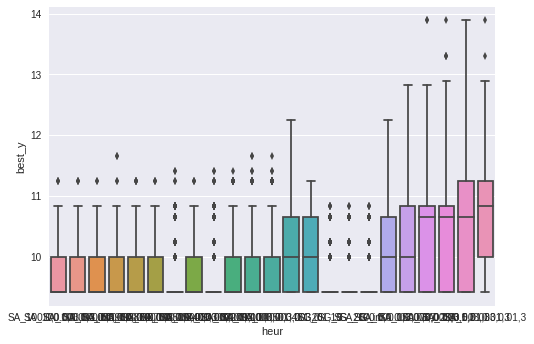

In [221]:
ax = sns.boxplot(x="heur", y="best_y", data=table)

In [222]:
table['success'] = table['neval'] < np.inf

In [223]:
table[table['success'] == True].groupby(['heur'])['neval'].median()

heur
SA_100.0,0.003,0.1,10     210.5
SA_100.0,0.003,0.1,100    547.0
SA_100.0,0.003,0.1,20     283.0
SA_100.0,0.003,0.1,200    609.0
SA_100.0,0.003,0.1,3      111.5
SA_100.0,0.003,0.1,300    625.0
SA_100.0,0.003,0.1,40     411.0
SA_100.0,0.003,0.1,400    708.0
SA_100.0,0.003,0.1,5      152.0
SA_100.0,0.003,0.1,50     435.0
SA_100.0,0.003,0.1,500    633.0
SA_100.0,0.003,0.1,7      171.0
SA_100.0,0.003,0.1,700    702.0
SA_100.0,0.003,0.1,800    709.0
SA_100.0,0.003,0.1,900    713.0
SA_100.0,0.003,0.1,inf    677.0
SA_20,0.003,0.01,3         94.0
SA_5,0.003,0.01,3          70.0
SA_70,0.003,0.01,3         89.0
SG_0                      466.5
SG_20                     273.0
SG_5                      300.0
SG_inf                    257.0
Name: neval, dtype: float64

In [224]:
table[table['success'] == True].groupby(['heur'])['neval'].mean()

heur
SA_100.0,0.003,0.1,10     262.020747
SA_100.0,0.003,0.1,100    514.881110
SA_100.0,0.003,0.1,20     324.914378
SA_100.0,0.003,0.1,200    572.769022
SA_100.0,0.003,0.1,3      170.031073
SA_100.0,0.003,0.1,300    603.109499
SA_100.0,0.003,0.1,40     420.317507
SA_100.0,0.003,0.1,400    615.767956
SA_100.0,0.003,0.1,5      208.592593
SA_100.0,0.003,0.1,50     427.427338
SA_100.0,0.003,0.1,500    584.719084
SA_100.0,0.003,0.1,7      236.926247
SA_100.0,0.003,0.1,700    623.653736
SA_100.0,0.003,0.1,800    630.732436
SA_100.0,0.003,0.1,900    656.718706
SA_100.0,0.003,0.1,inf    607.668885
SA_20,0.003,0.01,3        121.742537
SA_5,0.003,0.01,3          99.546667
SA_70,0.003,0.01,3        138.167722
SG_0                      475.141566
SG_20                     327.369637
SG_5                      362.470452
SG_inf                    320.278889
Name: neval, dtype: float64

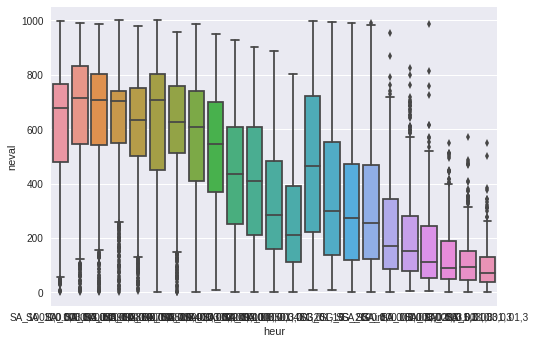

In [225]:
ax = sns.boxplot(x="heur", y="neval", data=table[table['success'] == True])

In [226]:
rel_by_heur = table.pivot_table(
    index=['heur'],
    values=['neval'],
    aggfunc=lambda x: len([n for n in x if n < np.inf])/len(x)
)
rel_by_heur.sort_values(by='neval', inplace=True)

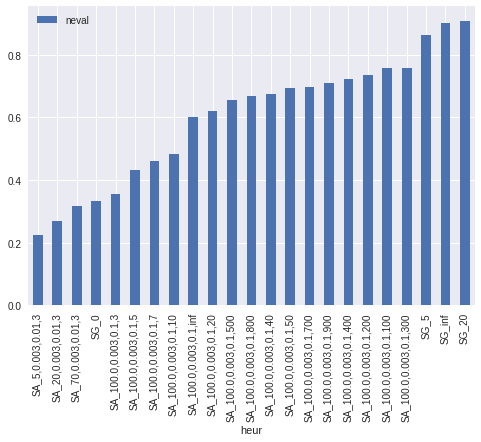

In [227]:
ax = rel_by_heur.plot(kind='bar')

In [228]:
feo_by_heur = table.pivot_table(
    index=['heur'],
    values=['neval'],
    aggfunc=lambda x: np.mean([n for n in x if n < np.inf])/(len([n for n in x if n < np.inf])/len(x))
    #                 ^^^   mean number of evaluations ^^^ / ^^^             reliability         ^^^^
)
feo_by_heur.sort_values(by='neval', inplace=True)

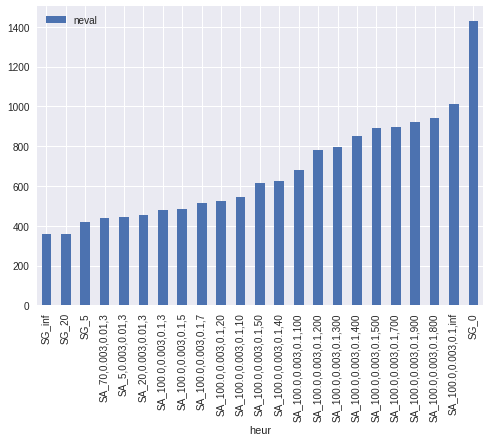

In [229]:
ax = feo_by_heur.plot(kind='bar')